In [44]:
import pandas as pd 


In [45]:
df_googlebooks1= pd.read_csv('google_books_1299.csv', header=0, delimiter=',')

In [46]:
df_googlebooks1.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"


In [47]:
df_googlebooks1.isna().sum()

Unnamed: 0         0
title              0
author             0
rating            75
voters            75
price              0
currency           0
description        3
publisher          0
page_count         0
generes            0
ISBN               0
language           0
published_date     0
dtype: int64

In [48]:
df_googlebooks1.columns

Index(['Unnamed: 0', 'title', 'author', 'rating', 'voters', 'price',
       'currency', 'description', 'publisher', 'page_count', 'generes', 'ISBN',
       'language', 'published_date'],
      dtype='object')

In [49]:
df_googlebooks1.dtypes

Unnamed: 0          int64
title              object
author             object
rating            float64
voters             object
price             float64
currency           object
description        object
publisher          object
page_count          int64
generes            object
ISBN               object
language           object
published_date     object
dtype: object

In [50]:
#Drop missing values in the ratings column as those are relevant for our project
df_googlebooks1 = df_googlebooks1.dropna(subset=["rating"])
df_googlebooks1.isna().sum()

Unnamed: 0        0
title             0
author            0
rating            0
voters            0
price             0
currency          0
description       3
publisher         0
page_count        0
generes           0
ISBN              0
language          0
published_date    0
dtype: int64

In [51]:
df_googlebooks1.groupby(['rating']).size()

rating
2.5     11
3.3      8
3.5      9
3.6      4
3.7     17
3.8     32
3.9     29
4.0    105
4.1     62
4.2     53
4.3    101
4.4    109
4.5    175
4.6    163
4.7    139
4.8     79
4.9     20
5.0    108
dtype: int64

Ratings range from 2.5 to 5.0. This is checked by the groupby.size() function.

In [52]:
#checking how many genres there are
df_googlebooks1.groupby(['generes']).size()

generes
Art , Popular Culture                                                    1
Art , Video Game Art                                                     1
Biography &amp, Autobiography , Business                                 1
Biography &amp, Autobiography , Entertainment &amp, Performing Arts      2
Biography &amp, Autobiography , Environmentalists &amp, Naturalists      1
                                                                      ... 
Young Adult Fiction , Fantasy , Dark Fantasy                             1
Young Adult Fiction , Fantasy , Epic                                     2
Young Adult Fiction , Humorous , General                                 1
Young Adult Fiction , Science Fiction , Alien Contact                    1
none                                                                   499
Length: 226, dtype: int64

In [54]:
df_googlebooks1["rating"].describe()

count    1224.000000
mean        4.424755
std         0.392489
min         2.500000
25%         4.200000
50%         4.500000
75%         4.700000
max         5.000000
Name: rating, dtype: float64

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='rating', ylabel='Count'>

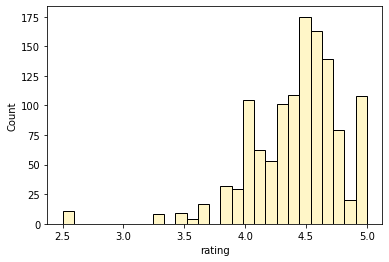

In [79]:
#with seaborn
sns.set_palette("YlOrBr")#setting a colour palette
sns.histplot(data=df_googlebooks1, x='rating')